## Any Changes
Our goal was to "analyse and forecast the energy usage in an urban city". Since the previous milestone there has not been a change in the goal.

## Data
The source of the data is the following link: [LINK](https://data.world/houston/houston-electricity-bills)

There are 4 files, they are:
1. July 2011 to June 2012 excel file - 57,430 rows and 24 columns
2. May 2012 to April 2013 excel file - 65,806 rows and 24 columns
3. July 2012 to June 2013 excel file - 66,776 rows and 24 columns
4. July 2013 to June 2014 excel file - 67,838 rows and 24 columns

The data tables contain information regarding the building address, location, service number, billing dates, total amount due. 

The plan is to go through and clean the data tables individually and make them consistent. Once that is done the next step is to merge the cleaned data tables. After merging the tables one important check is to search for duplicates since there is an overlap of dates it is highly likely that there will be duplicates.

Description of each column 
1. Reliant Contract No: A unique identifier for each contract. 
2. Service Address: Address for the service location
3. Meter No: Meter number for the service location.
4. ESID: Electric Service Identifier for the service location.
5. Business Area: Business area code for the service location.
6. Cost Center: Cost center code for the service location.
7. Fund: Fund code for the service location.
8. Bill Type: Type of bill (e.g. "T" for "Total", "P" for "Partial", etc.). 
9. Bill Date: Date the bill was generated. 
10. Read Date: Date the meter was read. 
11. Due Date: Due date for the bill. 
12. Meter Read: Meter reading for the service location. 
13. Base Cost: TBase cost for the service. 
14. T&D Discretionary: Transmission and Distribution Discretionary charge for the service. 
15. T&D Charges: Transmission and Distribution charge for the service. 
16. Current Due: Current due amount for the service.
17. Index Charge: Index charge for the service. 
18. Total Due: Total due amount for the service. 
19. Franchise Fee: Franchise fee for the service. 
20. Voucher Date: Date the voucher was issued for the service. 
21. Billed Demand: Billed demand for the service in KVA. 
22. kWh Usage: Kilowatt-hour usage for the service. 
23. Nodal Cu Charge:  Nodal Cu Charge for the service. 
24. Adder Charge:  Adder Charge for the service.

Statistical Data Type of Each Column 
1. Reliant Contract No: integer (ratio)
2. Service Address: string (nominal)
3. Meter No: integer (nominal)
4. ESID: integer (nominal)
5. Business Area: integer (ratio))
6. Cost Center: integer (ratio)
7. Fund: integer (ratio)
8. Bill Type: string (nominal)
9. Bill Date: date (nominal)
10. Read Date: date (nominal)
11. Due Date: date (nominal)
12. Meter Read: integer (ratio)
13. Base Cost: float (nominal)
14. T&D Discretionary: float (nominal)
15. T&D Charges: float (nominal)
16. Current Due: float (nominal)
17. Index Charge: float (nominal)
18. Total Due: float (nominal)
19. Franchise Fee: float (nominal)
20. Voucher Date: date (nominal)
21. Billed Demand (KVA): integer (nominal)
22. kWh Usage: integer (nominal)
23. Nodal Cu Charge: float (nominal)
24. Adder Charge: float (nominal)

## Problem
The key issue in generating electricity is to determine how much capacity to generate in order to meet future demand. 

Electricity usage forecasting involves predicting the demand for electricity over a specific eriod. This process has several uses, including energy procurement, where it helps suppliers purchase the right amount of energy to ensure a steady supply.

The advancement of smart infrastructure and integration of distributed renewable power has raised future supply, demand, and pricing uncertainties. This unpredictability has increased interest in price prediction and energy analysis.

## Research Questions
1. Previous electricity usage data can be used for predicting the usage for future (Time-Series) - Hyndavi 
2. Group areas based on their energy consumption (Clustering) - Sunil
3. Electricity usage can be predicted by using correlated features (Regression) - Sourabh
4. Classification of bill type can be done using features in the data (Classification) - Sharmisha

## Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score
import requests
import urllib
from tqdm import tqdm
import pickle

pd.options.display.max_columns=25

C:\Users\sbelde3\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data FY 2012 - Hyndavi

In [4]:
data_2012 = pd.read_excel('houston-houston-electricity-bills/coh-fy2012-ee-bills-july2011-june2012.xls')
orig_shape_2012 = data_2012.shape[0]

data_2012.shape

(57430, 24)

In [5]:
data_2012.head(5)

,Reliant Contract No,Service Address,Meter No,ESID,Business Area,Cost Center,Fund,Bill Type,Bill Date,Read Date,Due Date,Meter Read,Base Cost ($),T&D Discretionary ($),T&D Charges ($),Current Due ($),Adjustment ($),Total Due ($),Franchise Fee ($),Voucher Date,Billed Demand,kWh Usage,Nodal Cu Charge ($),Reliability Unit Charge ($)
0,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2012-06-26,2012-06-21,2012-07-26,47940.0,61070.65,1638.01,10440.86,73232.11,NaN,73232.11,-1047.28,2012-06-27,1507.291667,905421,82.59,0.0
1,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2012-05-25,2012-05-21,2012-06-24,47186.0,56319.47,1631.00,10364.63,68463.46,NaN,68463.46,-1045.21,2012-05-30,1496.907217,824107,148.36,0.0
2,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2012-04-27,2012-04-23,2012-05-27,46499.0,68461.63,1674.67,10676.79,80847.87,NaN,80847.87,-1081.11,2012-04-30,1562.500000,977744,34.78,0.0
3,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2012-03-27,2012-03-21,2012-04-26,45684.0,62036.29,1696.66,10681.48,74373.93,NaN,74373.93,-1087.32,2012-03-28,1567.708333,876838,-40.50,0.0
4,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2012-02-27,2012-02-21,2012-03-28,44954.0,61670.24,1703.80,10707.94,74080.27,NaN,74080.27,-1090.08,2012-02-28,1577.083333,872898,-1.71,0.0


### Checking Nulls

In [6]:
data_2012.isna().sum()

Reliant Contract No                0
Service Address                    0
Meter No                        7809
ESID                               0
Business Area                      0
Cost Center                        0
Fund                               0
Bill Type                          0
Bill Date                          0
Read Date                          0
Due Date                           0
Meter Read                         2
Base Cost ($)                      0
T&D Discretionary ($)              0
T&D Charges ($)                    0
Current Due ($)                    0
Adjustment ($)                 56259
Total Due ($)                      0
Franchise Fee ($)                  0
Voucher Date                       0
Billed Demand                      3
kWh Usage                          0
Nodal Cu Charge ($)                1
Reliability Unit Charge ($)        4
dtype: int64

### Checking Adjustment ($) column

In [7]:
data_2012['Adjustment ($)'].value_counts(dropna=False)

NaN       56259
0.0        1170
9425.9        1
Name: Adjustment ($), dtype: int64

The column does not have any relevant information based on the above reported values. Electing to drop the column.

In [8]:
data_2012.drop(columns=['Adjustment ($)'], inplace=True)

### Checking Unique Number of Customers

There are quite a few columns in the dataset that signify relating to a unique person/house/business. Checking the unique counts of such columns.

In [9]:
check_unique_columns = ['Reliant Contract No', 'Service Address ', 'Meter No', 
                        'ESID', 'Business Area', 'Cost Center',]

for col in check_unique_columns:
    print(f'Number of Unique Values in {col}: {data_2012[col].nunique()}')

Number of Unique Values in Reliant Contract No: 5241
Number of Unique Values in Service Address : 5183
Number of Unique Values in Meter No: 4021
Number of Unique Values in ESID: 5241
Number of Unique Values in Business Area: 9
Number of Unique Values in Cost Center: 38


Based on the above reported values and further research online:

ESID signifies a unique ID provided to each customer subscribed to the electricity board. It would be best to choose ESID and Service Address columns going forward as these would provide number of unique customers and the areas (streets) where higher usage of electricity occurs.

Business Area signifies a grouping a number of buildings which covers a certain area. This would be useful usage patterns grouped by certain zones in the city.

### Checking Bill Type

In [10]:
data_2012['Bill Type'].value_counts(dropna=False)

T    56859
P      552
C       19
Name: Bill Type, dtype: int64

Bill Type could signify the type of the connection given. Since commercial, residential and government spaces would have different type of pricing and needs this column could be capturing that information.

In [11]:
data_2012['Service Address '].nunique(), data_2012['Meter No'].nunique(), data_2012['ESID'].nunique()

(5183, 4021, 5241)

The next 3 columns are: Bill Date, Read Date and Due Date. Of these it would be best to choose the Bill date across all the data files to keep the data consistent. 

### Electricity Usage Statistics

In [12]:
data_2012[['Meter Read', 'Billed Demand ', 'kWh Usage']].describe()

,Meter Read,Billed Demand,kWh Usage
count,57428.000000,57427.000000,5.743000e+04
mean,10008.024135,52.581303,2.249732e+04
std,19208.052944,432.027165,2.216349e+05
min,0.000000,0.000000,0.000000e+00
25%,118.750000,0.000000,1.000000e+02
50%,2583.000000,0.000000,2.980000e+02
75%,7879.000000,11.000000,2.240000e+03
max,342348.000000,18495.555556,1.069344e+07


There are 3 columns that denote the amount of electricity: Meter Read, Billed Demand, kWh Usage.

Using kWh Usage as a standard unit of measurement.

In [13]:
data_2012[[
    'Base Cost ($)', 'T&D Discretionary ($)', 'T&D Charges ($)', 
    'Current Due ($)', 'Total Due ($)', 'Franchise Fee ($)', 
    'Nodal Cu Charge ($)', 'Reliability Unit Charge ($)'
     ]].describe()

,Base Cost ($),T&D Discretionary ($),T&D Charges ($),Current Due ($),Total Due ($),Franchise Fee ($),Nodal Cu Charge ($),Reliability Unit Charge ($)
count,57430.000000,57430.000000,57430.000000,57430.000000,57430.000000,57430.000000,57429.000000,57426.0
mean,1557.590034,404.377159,322.324780,2292.520167,2326.005266,-36.249975,8.067123,0.0
std,15332.140262,12617.605024,2103.325682,23457.157709,23484.415824,255.356787,136.268511,0.0
min,0.000000,-44.990000,-680.340000,-64.210000,0.000000,-9352.010000,-367.210000,0.0
25%,6.870000,3.240000,7.380000,18.650000,18.430000,-5.740000,0.000000,0.0
50%,20.590000,3.910000,12.440000,38.240000,38.490000,-0.500000,0.010000,0.0
75%,155.252500,17.070000,98.847500,312.610000,317.212500,0.000000,0.280000,0.0
max,740473.960000,754326.010000,64282.330000,907483.660000,907483.660000,0.000000,18019.450000,0.0


Reliability Unit Charge does not contain any useful information. Electing to drop that column.

The columns other than Current Due or Total Due are adding up the value present in these two columns. Going forward choosing the column Total Due ($). 
Based on the above statistics the columns Current Due and Total Due represent the same value. 

### Selecting and Filtering Columns

In [14]:
data_2012.columns

Index(['Reliant Contract No', 'Service Address ', 'Meter No', 'ESID',
       'Business Area', 'Cost Center', 'Fund', 'Bill Type', 'Bill Date',
       'Read Date', 'Due Date', 'Meter Read', 'Base Cost ($)',
       'T&D Discretionary ($)', 'T&D Charges ($)', 'Current Due ($)',
       'Total Due ($)', 'Franchise Fee ($)', 'Voucher Date', 'Billed Demand ',
       'kWh Usage', 'Nodal Cu Charge ($)', 'Reliability Unit Charge ($)'],
      dtype='object')

Based on the above analysis of the dataset choosing the following columns:

1. ESID
2. Business Area
3. Service Address 
3. Bill Type
4. Bill Date
5. Total Due ($)
6. kWh Usage

In [15]:
data_2012 = data_2012[[
    'ESID', 'Business Area', 'Service Address ', 'Bill Type',
    'Bill Date', 'Total Due ($)', 'kWh Usage'
]]

In [16]:
rename_cols = {
    'ESID': 'esid',
    'Business Area': 'business_area',
    'Service Address ': 'service_address',
    'Bill Type': 'bill_type',
    'Bill Date': 'bill_date',
    'Total Due ($)': 'total_due',
    'kWh Usage': 'kwh_usage'
}

data_2012_main = data_2012.rename(columns=rename_cols)

Checking for Nulls again and dtypes

In [17]:
data_2012_main.isna().sum()

esid               0
business_area      0
service_address    0
bill_type          0
bill_date          0
total_due          0
kwh_usage          0
dtype: int64

In [18]:
data_2012_main.dtypes

esid                       object
business_area               int64
service_address            object
bill_type                  object
bill_date          datetime64[ns]
total_due                 float64
kwh_usage                   int64
dtype: object

In [19]:
data_2012_main.shape

(57430, 7)

In [20]:
zscore_2012 = stats.zscore(data_2012_main[['total_due', 'kwh_usage']])

zscore_2012

,total_due,kwh_usage
0,3.019310,3.983720
1,2.816252,3.616835
2,3.343602,4.310039
3,3.067930,3.854755
4,3.055426,3.836978
...,...,...
57425,-0.070053,-0.090029
57426,-0.070059,-0.090029
57427,-0.070064,-0.090029
57428,-0.070255,-0.090029


Each zscore value signifies how many standard deviations away an individual value is from the mean. This is a good indicator to finding outliers in the dataframe.

Usually z-score=3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier which is pretty much similar to standard deviation method

In [21]:
# data_2012_main = data_2012_main[(np.abs(zscore_2012) < 3).all(axis=1)]

data_2012_main.shape

(57430, 7)

The number of rows has decreased from 57,430 to 57,025. So 405 rows were outliers based on the data.

In [22]:
data_2012_main.head(5)

,esid,business_area,service_address,bill_type,bill_date,total_due,kwh_usage
0,1008901000140050014100,2000,10518 BELLAIRE,T,2012-06-26,73232.11,905421
1,1008901000140050014100,2000,10518 BELLAIRE,T,2012-05-25,68463.46,824107
2,1008901000140050014100,2000,10518 BELLAIRE,T,2012-04-27,80847.87,977744
3,1008901000140050014100,2000,10518 BELLAIRE,T,2012-03-27,74373.93,876838
4,1008901000140050014100,2000,10518 BELLAIRE,T,2012-02-27,74080.27,872898


In [23]:
orig_shape_2012 - data_2012_main.shape[0]

0

In [24]:
data_2012.to_csv('electricity_usage_data_2012.csv', index=False)

The trend graph of both the cost and energy usage is the same as the value of cost = energy usage times the cost per unit.

## Performing a Similar Analysis on FY 2013-1, FY 2013-2, and FY 2014 before merging datasets

## Data FY 2013-1 - Sunil

In [25]:
data_2013 = pd.read_excel('houston-houston-electricity-bills/coh-fy2013-ee-bills-july2012-june2013.xlsx')
orig_shape_2013 = data_2013.shape[0]

data_2013.shape

(66776, 24)

In [26]:
data_2013.head(5)

,Reliant Contract No,Service Address,Meter No,ESID,Business Area,Cost Center,Fund,Bill Type,Bill Date,Read Date,Due Date,Meter Read,Base Cost ($),T&D Discretionary ($),T&D Charges ($),Current Due ($),Index Charge ($),Total Due ($),Franchise Fee ($),Voucher Date,Billed Demand (KVA),kWh Usage,Nodal Cu Charge ($),Adder Charge ($)
0,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2013-06-27,2013-06-23,2013-07-28,57061.0,57621.95,1319.11,10606.19,69785.20,NaN,69785.20,-1016.90,2013-07-01,1462.500000,876113.0,237.95,0.0
1,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2013-05-29,2013-05-23,2013-06-28,56331.0,57981.59,1316.35,10676.66,70177.01,NaN,70177.01,-1041.76,2013-05-30,1496.907217,879842.0,202.41,0.0
2,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2013-04-29,2013-04-23,2013-05-29,55598.0,67005.80,1357.92,10853.62,79309.40,NaN,79309.40,-1036.92,2013-04-30,1502.083333,997407.0,92.06,0.0
3,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2013-03-28,2013-03-21,2013-04-27,54767.0,57008.44,1300.83,10473.16,68778.30,NaN,68778.30,-995.50,2013-03-29,1432.989691,849351.0,-4.13,0.0
4,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2013-02-26,2013-02-21,2013-03-28,54059.0,61287.57,1313.49,10534.33,73135.18,NaN,73135.18,-1000.33,2013-02-27,1452.577320,911746.0,-0.21,0.0


### Checking Nulls

In [27]:
data_2013.isna().sum()

Reliant Contract No          0
Service Address              0
Meter No                 15228
ESID                         0
Business Area                0
Cost Center                  0
Fund                         0
Bill Type                    0
Bill Date                    0
Read Date                    0
Due Date                     0
Meter Read                  12
Base Cost ($)                1
T&D Discretionary ($)        0
T&D Charges ($)              1
Current Due ($)              0
Index Charge ($)         65183
Total Due ($)                0
Franchise Fee ($)            0
Voucher Date                 0
Billed Demand (KVA)         12
kWh Usage                    1
Nodal Cu Charge ($)          5
Adder Charge ($)            14
dtype: int64

### Checking Index Charge ($) column - This was previously Adjustment

In [28]:
data_2013['Index Charge ($)'].value_counts(dropna=False)

 NaN     65183
 0.00     1592
-0.54        1
Name: Index Charge ($), dtype: int64

The column does not have any relevant information based on the above reported values. Electing to drop the column.

In [29]:
data_2013.drop(columns=['Index Charge ($)'], inplace=True)

### Checking Unique Number of Customers

There are quite a few columns in the dataset that signify relating to a unique person/house/business. Checking the unique counts of such columns.

In [30]:
check_unique_columns = ['Reliant Contract No', 'Service Address ', 'Meter No', 
                        'ESID', 'Business Area', 'Cost Center',]

for col in check_unique_columns:
    print(f'Number of Unique Values in {col}: {data_2013[col].nunique()}')

Number of Unique Values in Reliant Contract No: 5900
Number of Unique Values in Service Address : 5840
Number of Unique Values in Meter No: 4035
Number of Unique Values in ESID: 5898
Number of Unique Values in Business Area: 9
Number of Unique Values in Cost Center: 39


Based on the above reported values and further research online:

ESID signifies a unique ID provided to each customer subscribed to the electricity board. It would be best to choose ESID and Service Address columns going forward as these would provide number of unique customers and the areas (streets) where higher usage of electricity occurs.

Business Area signifies a grouping a number of buildings which covers a certain area. This would be useful usage patterns grouped by certain zones in the city.

### Checking Bill Type

In [31]:
data_2013['Bill Type'].value_counts(dropna=False)

T    66222
P      552
C        2
Name: Bill Type, dtype: int64

Bill Type could signify the type of the connection given. Since commercial, residential and government spaces would have different type of pricing and needs this column could be capturing that information.

In [32]:
data_2013['Service Address '].nunique(), data_2013['Meter No'].nunique(), data_2013['ESID'].nunique()

(5840, 4035, 5898)

The next 3 columns are: Bill Date, Read Date and Due Date. Of these it would be best to choose the Bill date across all the data files to keep the data consistent. 

### Electricity Usage Statistics

In [33]:
data_2013[['Meter Read', 'Billed Demand (KVA)', 'kWh Usage']].describe()

,Meter Read,Billed Demand (KVA),kWh Usage
count,66764.000000,66764.000000,6.677500e+04
mean,9869.779829,44.208272,1.880421e+04
std,17911.694906,380.343991,2.024587e+05
min,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,1.000000e+00
50%,3123.000000,0.000000,2.310000e+02
75%,9007.250000,8.000000,1.680000e+03
max,239800.000000,16775.903614,9.689658e+06


There are 3 columns that denote the amount of electricity: Meter Read, Billed Demand, kWh Usage.

Using kWh Usage as a standard unit of measurement.

In [34]:
data_2013[[
    'Base Cost ($)', 'T&D Discretionary ($)', 'T&D Charges ($)', 
    'Current Due ($)', 'Total Due ($)', 'Franchise Fee ($)', 
    'Nodal Cu Charge ($)', 'Adder Charge ($)'
     ]].describe()

,Base Cost ($),T&D Discretionary ($),T&D Charges ($),Current Due ($),Total Due ($),Franchise Fee ($),Nodal Cu Charge ($),Adder Charge ($)
count,66775.000000,66776.000000,66775.000000,66776.000000,66776.000000,66776.000000,66771.000000,66762.0
mean,1249.628836,367.439382,278.533215,1901.861997,1902.580866,-33.921297,6.005230,0.0
std,13443.314342,11796.148872,1997.001709,21320.228167,21320.836910,237.409585,132.671939,0.0
min,0.000000,-7091.410000,-37666.730000,-44264.860000,0.000000,-7017.800000,-323.080000,0.0
25%,0.070000,3.120000,6.020000,11.820000,11.820000,-5.410000,0.000000,0.0
50%,15.360000,6.200000,10.940000,32.170000,32.040000,-0.460000,0.000000,0.0
75%,111.690000,20.730000,77.865000,234.010000,230.737500,0.000000,0.150000,0.0
max,650951.220000,756478.120000,69826.360000,907001.560000,907001.560000,84.910000,20461.930000,0.0


Adder Charge ($) does not contain any useful information. Electing to drop that column. Previously this column was Reliability Unit Charge.

The columns other than Current Due or Total Due are adding up the value present in these two columns. Going forward choosing the column Total Due ($). 
Based on the above statistics the columns Current Due and Total Due represent the same value. 

Based on the above analysis of the dataset choosing the following columns:

1. ESID
2. Business Area
3. Service Address 
3. Bill Type
4. Bill Date
5. Total Due ($)
6. kWh Usage

### Selecting and Filtering Columns

In [35]:
data_2013 = data_2013[[
    'ESID', 'Business Area', 'Service Address ', 'Bill Type',
    'Bill Date', 'Total Due ($)', 'kWh Usage'
]]

In [36]:
rename_cols = {
    'ESID': 'esid',
    'Business Area': 'business_area',
    'Service Address ': 'service_address',
    'Bill Type': 'bill_type',
    'Bill Date': 'bill_date',
    'Total Due ($)': 'total_due',
    'kWh Usage': 'kwh_usage'
}

data_2013_main = data_2013.rename(columns=rename_cols)

Checking for Nulls again and dtypes

In [37]:
data_2013_main.isna().sum()

esid               0
business_area      0
service_address    0
bill_type          0
bill_date          0
total_due          0
kwh_usage          1
dtype: int64

In [38]:
data_2013_main.dropna(subset=['kwh_usage'], inplace=True)

In [39]:
data_2013_main.isna().sum()

esid               0
business_area      0
service_address    0
bill_type          0
bill_date          0
total_due          0
kwh_usage          0
dtype: int64

In [40]:
data_2013_main.dtypes

esid                       object
business_area               int64
service_address            object
bill_type                  object
bill_date          datetime64[ns]
total_due                 float64
kwh_usage                 float64
dtype: object

In [41]:
data_2013_main.shape

(66775, 7)

In [42]:
zscore_2013 = stats.zscore(data_2013_main[['total_due', 'kwh_usage']])

zscore_2013

,total_due,kwh_usage
0,3.183862,4.234519
1,3.202239,4.252938
2,3.630570,4.833629
3,3.136636,4.102333
4,3.340984,4.410522
...,...,...
66771,-0.057672,-0.080314
66772,-0.057229,-0.080314
66773,-0.057217,-0.080314
66774,-0.057477,-0.080314


Each zscore value signifies how many standard deviations away an individual value is from the mean. This is a good indicator to finding outliers in the dataframe.

Usually z-score=3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier which is pretty much similar to standard deviation method

In [43]:
# data_2013_main = data_2013_main[(np.abs(zscore_2013) < 3).all(axis=1)]

data_2013_main.shape

(66775, 7)

The number of rows has decreased from 66,775 to 66,360. So 415 rows were outliers based on the data.

In [44]:
data_2013_main.head(5)

,esid,business_area,service_address,bill_type,bill_date,total_due,kwh_usage
0,1008901000140050014100,2000,10518 BELLAIRE,T,2013-06-27,69785.20,876113.0
1,1008901000140050014100,2000,10518 BELLAIRE,T,2013-05-29,70177.01,879842.0
2,1008901000140050014100,2000,10518 BELLAIRE,T,2013-04-29,79309.40,997407.0
3,1008901000140050014100,2000,10518 BELLAIRE,T,2013-03-28,68778.30,849351.0
4,1008901000140050014100,2000,10518 BELLAIRE,T,2013-02-26,73135.18,911746.0


In [45]:
orig_shape_2013 - data_2013_main.shape[0]

1

In [46]:
data_2013_main.to_csv('electricity_usage_data_2013.csv', index=False)

## Data FY 2013-2 - Sourabh

In [47]:
data_2013_2 = pd.read_excel('houston-houston-electricity-bills/coh-ee-bills-may2012-apr2013.xlsx')
orig_shape_2013_2 = data_2013_2.shape[0]

data_2013_2.shape

(65806, 24)

In [48]:
data_2013_2.head(5)

,Reliant Contract No,Service Address,Meter No,ESID,Business Area,Cost Center,Fund,Bill Type,Bill Date,Read Date,Due Date,Meter Read,Base Cost ($),T&D Discretionary ($),T&D Charges ($),Current Due ($),Adjustment ($),Total Due ($),Franchise Fee ($),Voucher Date,Billed Demand (KVA),kWh Usage,Nodal Cu Charge ($),Reliability Unit Charge ($)
0,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2013-04-29,2013-04-23,2013-05-29,55598.0,67005.80,1357.92,10853.62,79309.40,NaN,79309.40,-1036.92,2013-04-30,1502.083333,997407.0,92.06,0.0
1,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2013-03-28,2013-03-21,2013-04-27,54767.0,57008.44,1300.83,10473.16,68778.30,NaN,68778.30,-995.50,2013-03-29,1432.989691,849351.0,-4.13,0.0
2,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2013-02-26,2013-02-21,2013-03-28,54059.0,61287.57,1313.49,10534.33,73135.18,NaN,73135.18,-1000.33,2013-02-27,1452.577320,911746.0,-0.21,0.0
3,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2013-01-28,2013-01-22,2013-02-27,53299.0,64657.23,1369.20,10878.65,77043.90,NaN,77043.90,-1048.66,2013-01-29,1498.969072,969810.0,138.82,0.0
4,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2012-12-28,2012-12-20,2013-01-27,52491.0,60872.54,1612.61,10928.60,73740.34,NaN,73740.34,-1088.01,2012-12-31,1572.916667,927935.0,326.59,0.0


### Checking Nulls

In [49]:
data_2013_2.isna().sum()

Reliant Contract No                0
Service Address                    0
Meter No                       14049
ESID                               0
Business Area                      0
Cost Center                        0
Fund                               0
Bill Type                          0
Bill Date                          0
Read Date                          0
Due Date                           0
Meter Read                        16
Base Cost ($)                      0
T&D Discretionary ($)              0
T&D Charges ($)                    0
Current Due ($)                    0
Adjustment ($)                 64229
Total Due ($)                      0
Franchise Fee ($)                  0
Voucher Date                       0
Billed Demand (KVA)               16
kWh Usage                          1
Nodal Cu Charge ($)                4
Reliability Unit Charge ($)       16
dtype: int64

### Checking Adjustment ($) column 

This column was named Index Charge in the other FY 2013 electricity usage data file

In [50]:
data_2013_2['Adjustment ($)'].value_counts(dropna=False)

NaN       64229
0.0        1576
9425.9        1
Name: Adjustment ($), dtype: int64

The column does not have any relevant information based on the above reported values. Electing to drop the column.

In [51]:
data_2013_2.drop(columns=['Adjustment ($)'], inplace=True)

### Checking Unique Number of Customers

There are quite a few columns in the dataset that signify relating to a unique person/house/business. Checking the unique counts of such columns.

In [52]:
check_unique_columns = ['Reliant Contract No', 'Service Address ', 'Meter No', 
                        'ESID', 'Business Area', 'Cost Center',]

for col in check_unique_columns:
    print(f'Number of Unique Values in {col}: {data_2013_2[col].nunique()}')

Number of Unique Values in Reliant Contract No: 5786
Number of Unique Values in Service Address : 5725
Number of Unique Values in Meter No: 4035
Number of Unique Values in ESID: 5783
Number of Unique Values in Business Area: 9
Number of Unique Values in Cost Center: 39


Based on the above reported values and further research online:

ESID signifies a unique ID provided to each customer subscribed to the electricity board. It would be best to choose ESID and Service Address columns going forward as these would provide number of unique customers and the areas (streets) where higher usage of electricity occurs.

Business Area signifies a grouping a number of buildings which covers a certain area. This would be useful usage patterns grouped by certain zones in the city.

### Checking Bill Type

In [53]:
data_2013_2['Bill Type'].value_counts(dropna=False)

T    65252
P      552
C        2
Name: Bill Type, dtype: int64

Bill Type could signify the type of the connection given. Since commercial, residential and government spaces would have different type of pricing and needs this column could be capturing that information.

In [54]:
data_2013_2['Service Address '].nunique(), data_2013_2['Meter No'].nunique(), data_2013_2['ESID'].nunique()

(5725, 4035, 5783)

The next 3 columns are: Bill Date, Read Date and Due Date. Of these it would be best to choose the Bill date across all the data files to keep the data consistent. 

### Electricity Usage Statistics

In [55]:
data_2013_2[['Meter Read', 'Billed Demand (KVA)', 'kWh Usage']].describe()

,Meter Read,Billed Demand (KVA),kWh Usage
count,65790.000000,65790.000000,6.580500e+04
mean,9743.299217,45.011893,1.926132e+04
std,17901.894291,382.634210,2.047392e+05
min,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,1.000000e+00
50%,3004.500000,0.000000,2.410000e+02
75%,8669.000000,9.000000,1.789000e+03
max,239800.000000,16775.903614,9.689658e+06


There are 3 columns that denote the amount of electricity: Meter Read, Billed Demand, kWh Usage.

Using kWh Usage as a standard unit of measurement.

In [56]:
data_2013_2[[
    'Base Cost ($)', 'T&D Discretionary ($)', 'T&D Charges ($)', 
    'Current Due ($)', 'Total Due ($)', 'Franchise Fee ($)', 
    'Nodal Cu Charge ($)', 'Reliability Unit Charge ($)'
     ]].describe()

,Base Cost ($),T&D Discretionary ($),T&D Charges ($),Current Due ($),Total Due ($),Franchise Fee ($),Nodal Cu Charge ($),Reliability Unit Charge ($)
count,65806.000000,65806.000000,65806.000000,65806.000000,65806.000000,65806.000000,65802.000000,65790.0
mean,1286.967789,374.537243,283.605427,1950.938646,1951.890851,-34.636836,5.695807,0.0
std,13665.877497,11888.489071,1995.337024,21571.815431,21572.522026,241.014300,132.109391,0.0
min,0.000000,-7091.410000,-37666.730000,-44264.860000,0.000000,-7017.800000,-323.080000,0.0
25%,0.070000,3.100000,6.020000,10.830000,11.020000,-5.520000,0.000000,0.0
50%,16.070000,5.800000,11.140000,32.770000,32.650000,-0.460000,0.000000,0.0
75%,119.257500,21.527500,81.792500,250.297500,247.592500,0.000000,0.140000,0.0
max,650951.220000,756478.120000,69826.360000,907001.560000,907001.560000,84.910000,20461.930000,0.0


Reliability Unit Charge ($) does not contain any useful information. Electing to drop that column.

The columns other than Current Due or Total Due are adding up the value present in these two columns. Going forward choosing the column Total Due ($). 
Based on the above statistics the columns Current Due and Total Due represent the same value. 

Based on the above analysis of the dataset choosing the following columns:

1. ESID
2. Business Area
3. Service Address 
3. Bill Type
4. Bill Date
5. Total Due ($)
6. kWh Usage

### Selecting and Filtering Columns

In [57]:
data_2013_2 = data_2013_2[[
    'ESID', 'Business Area', 'Service Address ', 'Bill Type',
    'Bill Date', 'Total Due ($)', 'kWh Usage'
]]

In [58]:
rename_cols = {
    'ESID': 'esid',
    'Business Area': 'business_area',
    'Service Address ': 'service_address',
    'Bill Type': 'bill_type',
    'Bill Date': 'bill_date',
    'Total Due ($)': 'total_due',
    'kWh Usage': 'kwh_usage'
}

data_2013_2_main = data_2013_2.rename(columns=rename_cols)

Checking for Nulls again and dtypes

In [59]:
data_2013_2_main.isna().sum()

esid               0
business_area      0
service_address    0
bill_type          0
bill_date          0
total_due          0
kwh_usage          1
dtype: int64

In [60]:
data_2013_2_main.dropna(subset=['kwh_usage'], inplace=True)

In [61]:
data_2013_2_main.isna().sum()

esid               0
business_area      0
service_address    0
bill_type          0
bill_date          0
total_due          0
kwh_usage          0
dtype: int64

In [62]:
data_2013_2_main.dtypes

esid                       object
business_area               int64
service_address            object
bill_type                  object
bill_date          datetime64[ns]
total_due                 float64
kwh_usage                 float64
dtype: object

In [63]:
data_2013_2_main.shape

(65805, 7)

In [64]:
zscore_2013_2 = stats.zscore(data_2013_2_main[['total_due', 'kwh_usage']])

zscore_2013_2

,total_due,kwh_usage
0,3.585927,4.777556
1,3.097755,4.054406
2,3.299719,4.359162
3,3.480909,4.642764
4,3.327772,4.438234
...,...,...
65801,-0.058835,-0.081652
65802,-0.059092,-0.081652
65803,-0.058462,-0.081652
65804,-0.058694,-0.081652


Each zscore value signifies how many standard deviations away an individual value is from the mean. This is a good indicator to finding outliers in the dataframe.

Usually z-score=3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier which is pretty much similar to standard deviation method

In [65]:
# data_2013_2_main = data_2013_2_main[(np.abs(zscore_2013_2) < 3).all(axis=1)]

data_2013_2_main.shape

(65805, 7)

The number of rows has decreased from 65,805 to 65,388. So 417 rows were outliers based on the data.

In [66]:
data_2013_2_main.head(5)

,esid,business_area,service_address,bill_type,bill_date,total_due,kwh_usage
0,1008901000140050014100,2000,10518 BELLAIRE,T,2013-04-29,79309.40,997407.0
1,1008901000140050014100,2000,10518 BELLAIRE,T,2013-03-28,68778.30,849351.0
2,1008901000140050014100,2000,10518 BELLAIRE,T,2013-02-26,73135.18,911746.0
3,1008901000140050014100,2000,10518 BELLAIRE,T,2013-01-28,77043.90,969810.0
4,1008901000140050014100,2000,10518 BELLAIRE,T,2012-12-28,73740.34,927935.0


In [67]:
orig_shape_2013_2 - data_2013_2_main.shape[0]

1

In [68]:
data_2013_2_main.to_csv('electricity_usage_data_2013_2.csv', index=False)

## Data FY 2014 - Sharmisha

In [69]:
data_2014 = pd.read_excel('houston-houston-electricity-bills/coh-fy2014-ee-bills-july2013-june2014.xlsx')
orig_shape_2014 = data_2014.shape[0]

data_2014.shape

(67838, 24)

In [70]:
data_2014.head(5)

,Reliant Contract No,Service Address,Meter No,ESID,Business Area,Cost Center,Fund,Bill Type,Bill Date,Read Date,Due Date,Meter Read,Base Cost ($),T&D Discretionary ($),T&D Charges ($),Current Due ($),Index Charge ($),Total Due ($),Franchise Fee ($),Voucher Date,Billed Demand (KVA),kWh Usage,Nodal Cu Charge ($),Adder Charge ($)
0,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2014-05-28,2014-05-21,2014-06-27,64981.0,36098.63,2600.53,10078.92,50249.89,0.0,50249.89,-1014.83,2014-05-29,1470.526316,818192,479.19,0.0
1,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2014-04-28,2014-04-22,2014-05-28,64299.0,38619.91,2576.95,9978.70,52378.23,0.0,52378.23,-1005.86,2014-04-29,1442.268041,875338,161.23,0.0
2,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2014-03-27,2014-03-23,2014-04-26,63569.0,36275.51,2538.54,9896.25,49788.85,0.0,49788.85,-981.00,2014-03-28,1425.000000,822201,93.04,0.0
3,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2014-02-27,2014-02-23,2014-03-29,62884.0,43283.31,2207.88,9373.41,56056.70,0.0,56056.70,-1053.49,2014-02-28,1513.265306,981036,77.36,0.0
4,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2014-01-27,2014-01-21,2014-02-26,62066.0,37987.10,1992.16,8762.55,49748.12,0.0,49748.12,-950.63,2014-01-30,1373.195876,860995,17.73,0.0


### Checking Nulls

In [71]:
data_2014.isna().sum()

Reliant Contract No          0
Service Address              0
Meter No                 17633
ESID                         0
Business Area                0
Cost Center                  0
Fund                         0
Bill Type                    0
Bill Date                    0
Read Date                    0
Due Date                     0
Meter Read                  16
Base Cost ($)                6
T&D Discretionary ($)        0
T&D Charges ($)              0
Current Due ($)              0
Index Charge ($)             3
Total Due ($)                0
Franchise Fee ($)            0
Voucher Date                 0
Billed Demand (KVA)         16
kWh Usage                    0
Nodal Cu Charge ($)          7
Adder Charge ($)             3
dtype: int64

### Checking Index Charge ($) column - This was previously Adjustment

In [72]:
data_2014['Index Charge ($)'].value_counts(dropna=False)

0.00        67320
NaN             3
8.23            3
8.04            2
7.36            2
            ...  
13587.81        1
10639.12        1
9521.45         1
93.97           1
70.22           1
Name: Index Charge ($), Length: 511, dtype: int64

The column does does have information regarding a certain price. Since we are using the total due amount at the end, Index Charge ($) does not need to be present again, as it would be included in the total due amount.

In [73]:
data_2014.drop(columns=['Index Charge ($)'], inplace=True)

### Checking Unique Number of Customers

There are quite a few columns in the dataset that signify relating to a unique person/house/business. Checking the unique counts of such columns.

In [74]:
check_unique_columns = ['Reliant Contract No', 'Service Address ', 'Meter No', 
                        'ESID', 'Business Area', 'Cost Center',]

for col in check_unique_columns:
    print(f'Number of Unique Values in {col}: {data_2014[col].nunique()}')

Number of Unique Values in Reliant Contract No: 5888
Number of Unique Values in Service Address : 5824
Number of Unique Values in Meter No: 4026
Number of Unique Values in ESID: 5885
Number of Unique Values in Business Area: 8
Number of Unique Values in Cost Center: 34


NOTE: Compared to previous years, there is one less business area.

Based on the above reported values and further research online:

ESID signifies a unique ID provided to each customer subscribed to the electricity board. It would be best to choose ESID and Service Address columns going forward as these would provide number of unique customers and the areas (streets) where higher usage of electricity occurs.

Business Area signifies a grouping a number of buildings which covers a certain area. This would be useful usage patterns grouped by certain zones in the city.

### Checking Bill Type

In [75]:
data_2014['Bill Type'].value_counts(dropna=False)

T    67340
P      498
Name: Bill Type, dtype: int64

Bill Type could signify the type of the connection given. Since commercial, residential and government spaces would have different type of pricing and needs this column could be capturing that information.

Previously there were 3 types of Bills. T, P, and C. But in year 2014 there are only 2 types. 

In [76]:
data_2014['Service Address '].nunique(), data_2014['Meter No'].nunique(), data_2014['ESID'].nunique()

(5824, 4026, 5885)

The next 3 columns are: Bill Date, Read Date and Due Date. Of these it would be best to choose the Bill date across all the data files to keep the data consistent. 

### Electricity Usage Statistics

In [77]:
data_2014[['Meter Read', 'Billed Demand (KVA)', 'kWh Usage']].describe()

,Meter Read,Billed Demand (KVA),kWh Usage
count,67822.000000,67822.000000,6.783800e+04
mean,11922.180792,41.816244,1.757642e+04
std,19950.210597,365.658193,1.925858e+05
min,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,1.000000e+00
50%,4507.000000,0.000000,2.200000e+02
75%,12230.750000,7.000000,1.419750e+03
max,492196.000000,17348.148148,9.383361e+06


There are 3 columns that denote the amount of electricity: Meter Read, Billed Demand, kWh Usage.

Using kWh Usage as a standard unit of measurement.

In [78]:
data_2014[[
    'Base Cost ($)', 'T&D Discretionary ($)', 'T&D Charges ($)', 
    'Current Due ($)', 'Total Due ($)', 'Franchise Fee ($)', 
    'Nodal Cu Charge ($)', 'Adder Charge ($)'
     ]].describe()

,Base Cost ($),T&D Discretionary ($),T&D Charges ($),Current Due ($),Total Due ($),Franchise Fee ($),Nodal Cu Charge ($),Adder Charge ($)
count,67832.000000,67838.000000,67838.000000,67838.000000,67838.000000,67838.000000,67831.000000,67835.000000
mean,752.493762,346.176442,243.271038,1429.004427,1428.948580,-30.802815,2.847491,8.410448
std,8850.260472,11412.058754,1761.077978,17419.486301,17420.904924,210.583496,42.663730,276.832133
min,-1269.920000,-45.930000,-1715.790000,-104.790000,0.000000,-6179.070000,-0.010000,0.000000
25%,0.070000,3.140000,5.750000,12.080000,12.080000,-4.830000,0.000000,0.000000
50%,10.020000,6.440000,10.380000,27.330000,27.270000,-0.470000,0.030000,0.000000
75%,59.690000,17.800000,60.692500,164.850000,164.212500,0.000000,0.170000,0.000000
max,586509.580000,781792.760000,70591.250000,906606.680000,906606.680000,0.000000,5531.690000,12528.970000


Adder Charge ($) does not contain any useful information. Electing to drop that column. Previously this column was Reliability Unit Charge.

The columns other than Current Due or Total Due are adding up the value present in these two columns. Going forward choosing the column Total Due ($). 
Based on the above statistics the columns Current Due and Total Due represent the same value. 

Based on the above analysis of the dataset choosing the following columns:

1. ESID
2. Business Area
3. Service Address 
3. Bill Type
4. Bill Date
5. Total Due ($)
6. kWh Usage

### Selecting and Filtering Columns

In [79]:
data_2014 = data_2014[[
    'ESID', 'Business Area', 'Service Address ', 'Bill Type',
    'Bill Date', 'Total Due ($)', 'kWh Usage'
]]

In [80]:
rename_cols = {
    'ESID': 'esid',
    'Business Area': 'business_area',
    'Service Address ': 'service_address',
    'Bill Type': 'bill_type',
    'Bill Date': 'bill_date',
    'Total Due ($)': 'total_due',
    'kWh Usage': 'kwh_usage'
}

data_2014_main = data_2014.rename(columns=rename_cols)

Checking for Nulls again and dtypes

In [81]:
data_2014_main.isna().sum()

esid               0
business_area      0
service_address    0
bill_type          0
bill_date          0
total_due          0
kwh_usage          0
dtype: int64

In [82]:
data_2014_main.dtypes

esid                       object
business_area               int64
service_address            object
bill_type                  object
bill_date          datetime64[ns]
total_due                 float64
kwh_usage                   int64
dtype: object

In [83]:
data_2014_main.shape

(67838, 7)

In [84]:
zscore_2014 = stats.zscore(data_2014_main[['total_due', 'kwh_usage']])

zscore_2014

,total_due,kwh_usage
0,2.802455,4.157220
1,2.924627,4.453952
2,2.775990,4.178037
3,3.135782,5.002792
4,2.773652,4.379476
...,...,...
67833,-0.044563,-0.078056
67834,0.024122,-0.078056
67835,-0.047622,-0.078056
67836,-0.047384,-0.078056


Each zscore value signifies how many standard deviations away an individual value is from the mean. This is a good indicator to finding outliers in the dataframe.

Usually z-score=3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier which is pretty much similar to standard deviation method

In [85]:
# data_2014_main = data_2014_main[(np.abs(zscore_2014) < 3).all(axis=1)]

data_2014_main.shape

(67838, 7)

The number of rows has decreased from 67,838 to 67,427. So 411 rows were outliers based on the data.

In [86]:
data_2014_main.head(5)

,esid,business_area,service_address,bill_type,bill_date,total_due,kwh_usage
0,1008901000140050014100,2000,10518 BELLAIRE,T,2014-05-28,50249.89,818192
1,1008901000140050014100,2000,10518 BELLAIRE,T,2014-04-28,52378.23,875338
2,1008901000140050014100,2000,10518 BELLAIRE,T,2014-03-27,49788.85,822201
3,1008901000140050014100,2000,10518 BELLAIRE,T,2014-02-27,56056.70,981036
4,1008901000140050014100,2000,10518 BELLAIRE,T,2014-01-27,49748.12,860995


In [87]:
orig_shape_2014 - data_2014_main.shape[0]

0

In [88]:
data_2014_main.to_csv('electricity_usage_data_2014.csv', index=False)

## Merging the DataFrames - Sourabh

In [89]:
df_list = [data_2012_main, data_2013_main, data_2013_2_main, data_2014_main]

data = pd.concat(df_list)
data.shape

(257848, 7)

Since we cleaned each df separetely there should not be any NANs, but checking for it nonetheless.

In [90]:
data.isna().sum()

esid               0
business_area      0
service_address    0
bill_type          0
bill_date          0
total_due          0
kwh_usage          0
dtype: int64

### Checking for Duplicate Rows

Since there is an overlap in time period for the CSV files it is important not to have repeating rows.

We can check for this in the following way: A particular ESID should be billed only once. Therefore by taking a subset of ESID, Business Area and Bill Date we can know if a particular customer's billing info has been repeated in the df or not.

In [91]:
dup_rows_index = data.duplicated(subset=['esid', 'business_area', 'service_address', 'bill_date'])
(dup_rows_index).sum()

66595

This confirms the doubt that the overlap with the FY 2012 and FY 2013 with the CSV file has generated duplicate rows in the data.
We need to remove these columns.

In [92]:
data_main = data[~(dup_rows_index)]

data_main.shape

(191253, 7)

In [93]:
data_main.to_csv('Electricity_Usage_Data.csv', index=False)

## Visualizations

In [2]:
import time
from pprint import pprint

In [3]:
data_main = pd.read_csv('Electricity_Usage_Data.csv')

In [4]:
data_main[['bill_date']] = data_main[['bill_date']].apply(pd.to_datetime)

In [5]:
data_main.loc[:,'bill_date'] = data_main['bill_date'].apply(lambda x: pd.to_datetime(f'{x.year}-{x.month}-01'))

In [6]:
viz_df = data_main.set_index('bill_date')

In [7]:
viz_df.head()

,esid,business_area,service_address,bill_type,total_due,kwh_usage
bill_date,,,,,,
2012-06-01,1008901000140050014100,2000,10518 BELLAIRE,T,73232.11,905421.0
2012-05-01,1008901000140050014100,2000,10518 BELLAIRE,T,68463.46,824107.0
2012-04-01,1008901000140050014100,2000,10518 BELLAIRE,T,80847.87,977744.0
2012-03-01,1008901000140050014100,2000,10518 BELLAIRE,T,74373.93,876838.0
2012-02-01,1008901000140050014100,2000,10518 BELLAIRE,T,74080.27,872898.0


### Visualization #1 - Hyndavi

In [8]:
def plotbox(df, column):
    plot_features = df.groupby(pd.Grouper(freq=str(60)+'T')).mean().copy()
    plot_features[column] = [eval('x.%s'%column) for x in plot_features.index] 
    plot_features.boxplot('kwh_usage', by=column, figsize=(12, 8), grid=False)
    plt.ylabel('kWh Usage')
    plt.xlabel(column)
    plt.show()

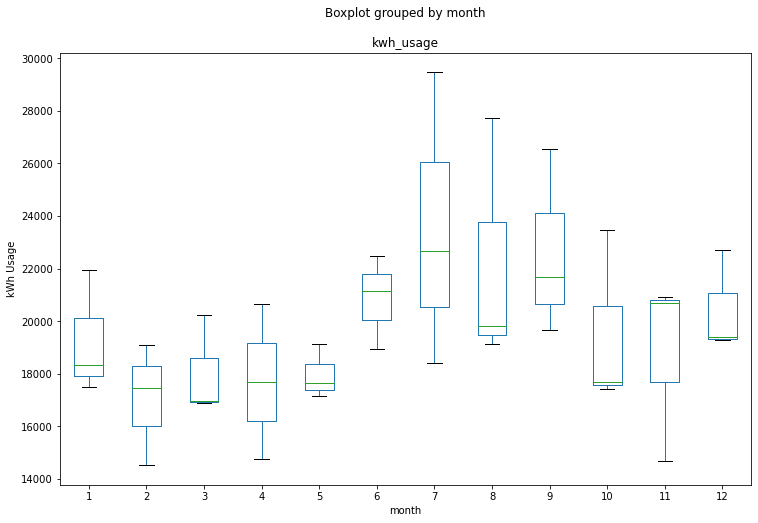

In [9]:
plotbox(viz_df, 'month')

Based on the above box plot, we can see that the highest energy is consumed in the months of June-September. That is in the summer/fall season energy usage is quite high.

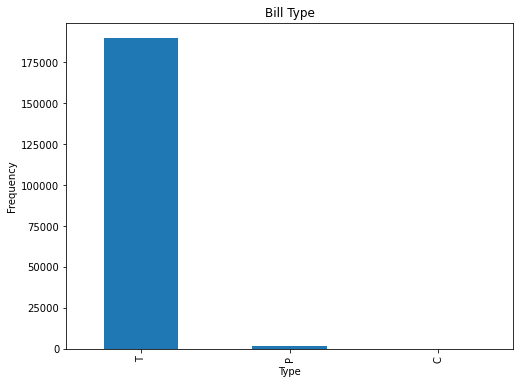

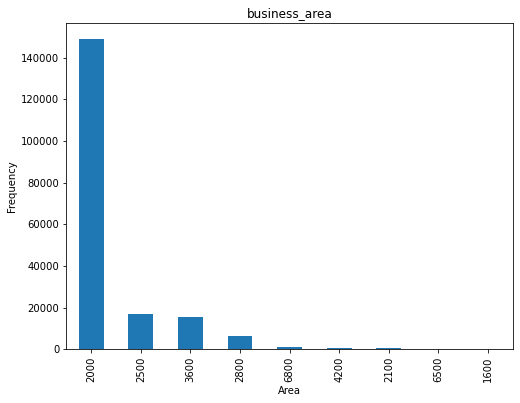

In [10]:
# Bar chart for 'Bill Type'
plt.figure(figsize=(8, 6))
data_main['bill_type'].value_counts().plot(kind='bar')
plt.title('Bill Type')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

# Bar chart for 'Business Area'
plt.figure(figsize=(8, 6))
data_main['business_area'].value_counts().plot(kind='bar')
plt.title('business_area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

The business area 2000 is the most populous area based on the frequency plot.

And the most common type of Bill type is T.

### Visualization #2 - Sunil

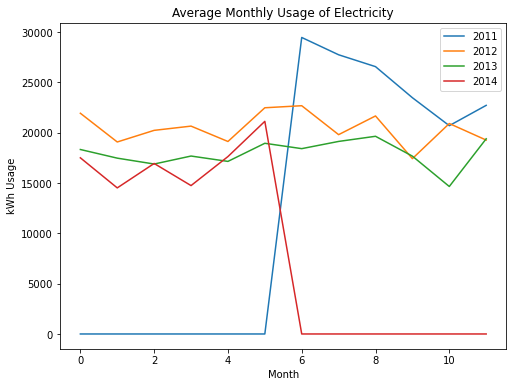

In [11]:
viz_df_2 = data_main.groupby('bill_date').agg({'kwh_usage':'mean'}).reset_index()

temp_list = [0 for _ in range(12)]

date_dict = {
    '2011': temp_list.copy(),
    '2012': temp_list.copy(),
    '2013': temp_list.copy(),
    '2014': temp_list.copy(),
}

for date, usage in viz_df_2.values:
    date_dict[str(date.year)][date.month-1] = usage

usage_2011 = date_dict['2011']
usage_2012 = date_dict['2012']
usage_2013 = date_dict['2013']
usage_2014 = date_dict['2014']


plt.figure(figsize=(8,6))
plt.plot(range(12), usage_2011, label='2011')
plt.plot(range(12), usage_2012, label='2012')
plt.plot(range(12), usage_2013, label='2013')
plt.plot(range(12), usage_2014, label='2014')
plt.xlabel('Month')
plt.ylabel('kWh Usage')
plt.title('Average Monthly Usage of Electricity')
plt.legend()
plt.show()

In 2011 the first 6 months and  in 2014 the last 6 months have the value 0. This is due to the fact that the data has been collected for each year from July of the current year to June of the next year (Financial Year).

Similar to the previous plot, we can see the same trend. But one thing to be observed is that the trend across all these years has remained relatively same across the months even in these 4 years.

### Visualization #3 - Sourabh

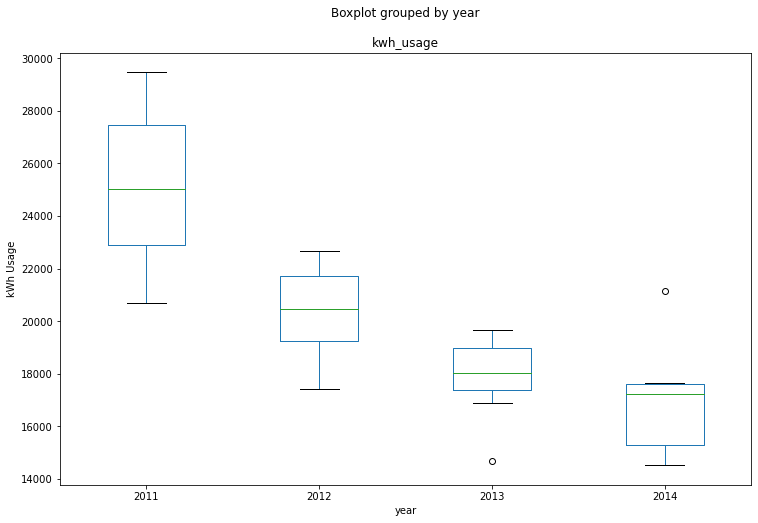

In [12]:
plotbox(viz_df, 'year')

It was expected that energy consumption would increase through the years. It was surprising to see that the energy use in fact decreased. Further analysis needs to be done in order to see why this might have happened.

In [13]:
data_main_agg = data_main.groupby('business_area').agg({
    'esid': pd.Series.nunique,
    'total_due': 'mean',
    'kwh_usage': 'mean',
})

data_main_agg.sort_values(by='kwh_usage', ascending=False)

,esid,total_due,kwh_usage
business_area,,,
1600,2,20686.296296,267252.759259
4200,32,12314.233342,139198.855389
2800,202,7763.883129,99229.628037
6500,10,2069.572381,24864.882784
2500,574,1762.559758,21484.003090
2000,4759,1685.935398,16412.006549
2100,23,1153.184006,13450.079826
3600,449,856.760282,9159.579703
6800,39,308.368067,3174.383499


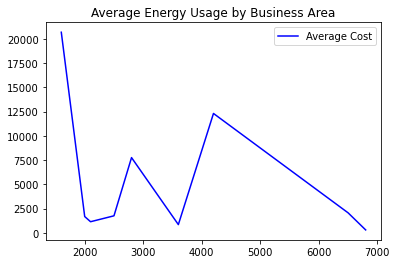

In [14]:
plt.plot(data_main_agg.index, data_main_agg['total_due'], color='b', label='Average Cost')
plt.title('Average Energy Usage by Business Area')
plt.legend()
plt.show()

In [15]:
address_enc = LabelEncoder()
bill_type_enc = LabelEncoder()

data_main['address_enc'] = address_enc.fit_transform(data_main['service_address'])
data_main['bill_type_enc'] = bill_type_enc.fit_transform(data_main['bill_type'])
data_main['year'] = data_main['bill_date'].apply(lambda x:x.year)
data_main['month'] = data_main['bill_date'].apply(lambda x:x.month)

<AxesSubplot:>

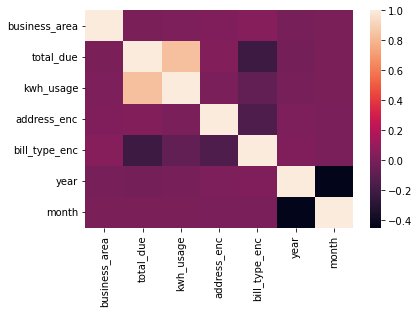

In [16]:
sns.heatmap(data_main.corr())

There do not seem to be any features that have high correlation with kwh usage except total due. But this is to be expected since the amount of energy used is directly proportional to the cost.

It might be difficult to use the features as they are for ML modeling.

### Visualization #4 - Sharmisha

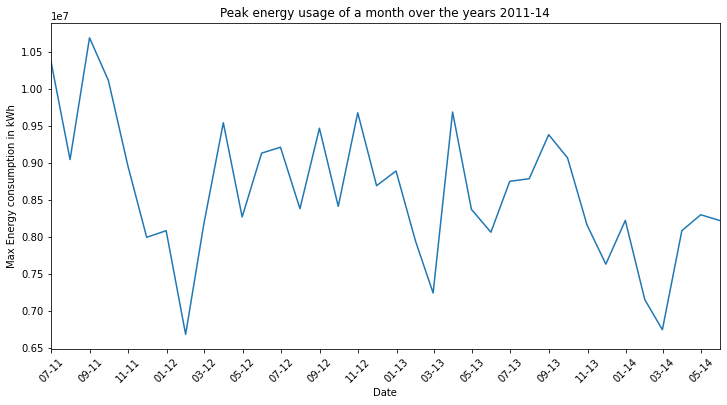

In [17]:
monthly_en = viz_df.resample('M', label = 'left')['kwh_usage'].max()
plt.figure(figsize = (12,6))

#plotting the max monthly energy consumption
plt.plot(monthly_en)
# ensuring the limits on x axis to be between the dataframe's datetime limits
plt.xlim(monthly_en.index.min(), monthly_en.index.max())
# Using matplotlib MonthLocator to be used in the xticks to mark individual months
locator = mdates.MonthLocator(bymonthday = 1, interval = 2)  # every 2 months 
fmt = mdates.DateFormatter('%m-%y') 
X = plt.gca().xaxis
# Setting the locator
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.xticks(rotation = 45)
plt.ylabel('Max Energy consumption in kWh')
plt.xlabel('Date')
plt.title('Peak energy usage of a month over the years 2011-14')
plt.show()


There is a noticable trend in the usage of energy across the months starting from 2011 to 2014.

## ML Models

In [18]:
address_enc = LabelEncoder()
bill_type_enc = LabelEncoder()

data_main['address_enc'] = address_enc.fit_transform(data_main['service_address'])
data_main['bill_type_enc'] = bill_type_enc.fit_transform(data_main['bill_type'])
data_main['year'] = data_main['bill_date'].apply(lambda x:x.year)
data_main['month'] = data_main['bill_date'].apply(lambda x:x.month)

### Regression - Task: Predicting Energy Usage - Sourabh

Models Proposed:
1. Linear Regression - Simple and easy to understand model. Using this to set a baseline. assumes linear relationship between thhe input features and the target variable.
2. Gradient Boosting Regressor - Since this model is an ensemble model which combines, multiple decision tree. Expecting good accuracy from this model. can be computationally expensive and may require more resources to other models
3. Decision Tree Regressor - This is a simple, interpretable model. can handle non-linear relationships between the input features. Can be prone to overfitting on the train data

In [19]:
def regression_metrics(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f'Train R2 Score: {r2_score(y_train, y_train_pred)}')
    print(f'Test R2 Score: {r2_score(y_test, y_test_pred)}')

    print(f'Train MSE Score: {mean_squared_error(y_train, y_train_pred)}')
    print(f'Test MSE Score: {mean_squared_error(y_test, y_test_pred)}')

In [20]:
X = data_main[[
    'business_area', 'address_enc', 'bill_type_enc', 'year', 'month'
]]
y = data_main[['kwh_usage']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression

In [22]:
reg = LinearRegression().fit(X_train, y_train)

In [23]:
regression_metrics(reg, X_train, X_test, y_train, y_test)

Train R2 Score: 0.009173833177215318
Test R2 Score: 0.007167343822345074
Train MSE Score: 39877725926.044525
Test MSE Score: 49616557595.280334


#### Gradient Boosting Regression

In [24]:
gbr = GradientBoostingRegressor().fit(X_train, np.ravel(y_train))

In [25]:
regression_metrics(gbr, X_train, X_test, np.ravel(y_train), np.ravel(y_test))

Train R2 Score: 0.7043295722890507
Test R2 Score: 0.7315554088149221
Train MSE Score: 11899831348.320082
Test MSE Score: 13415449659.919912


#### Decision Tree Regressor

In [26]:
dtr = DecisionTreeRegressor().fit(X_train, np.ravel(y_train))

In [27]:
regression_metrics(dtr, X_train, X_test, np.ravel(y_train), np.ravel(y_test))

Train R2 Score: 0.9328533753005721
Test R2 Score: 0.9248189115399102
Train MSE Score: 2702446489.891373
Test MSE Score: 3757155631.8635364


### Classification - Task: Predicting Type of Bill - Sharmisha

Models proposed:
1. Logistic Regression - widely used interpretable model which can be used for setting a baseline accuracy. This model assumed linear relationship between the variables, so mighht give bad results

2. Decision Tree Classifier - It can handle the non-linear relationships well between input and target variable. Can be prone to overfitting on the train data.

3. Random Forest Classifier - ensemble model, takes advantage of multiple decision trees to create a powerful model. But this model is not easy to interpret and requires more computational resource to run.

In [28]:
def classification_metrics(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f'Train F1 Score: {f1_score(y_train, y_train_pred, average="macro")}')
    print(f'Test F1 Score: {f1_score(y_test, y_test_pred, average="macro")}')

    print(f'Train Accuracy Score: {accuracy_score(y_train, y_train_pred)}')
    print(f'Test Accuract Score: {accuracy_score(y_test, y_test_pred)}')

In [29]:
X = data_main[[
    'business_area', 'address_enc', 'kwh_usage', 'year', 'month'
]]
y = data_main[['bill_type_enc']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [31]:
lreg = LogisticRegression().fit(X_train, np.ravel(y_train))

C:\Users\sbelde3\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
classification_metrics(lreg, X_train, X_test, y_train, y_test)

Train F1 Score: 0.44078631425979947
Test F1 Score: 0.43995857012872036
Train Accuracy Score: 0.9931112011607691
Test Accuract Score: 0.9935426524796738


#### Decision Tree Classifier

In [33]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)

In [34]:
classification_metrics(dtc, X_train, X_test, y_train, y_test)

Train F1 Score: 0.9998707454630322
Test F1 Score: 0.6666403148167668
Train Accuracy Score: 0.9999934641377237
Test Accuract Score: 0.9998431413557816


#### Random Forest Classifier

In [35]:
rfc = RandomForestClassifier().fit(X_train, np.ravel(y_train))

In [36]:
classification_metrics(dtc, X_train, X_test, np.ravel(y_train), np.ravel(y_test))

Train F1 Score: 0.9998707454630322
Test F1 Score: 0.6666403148167668
Train Accuracy Score: 0.9999934641377237
Test Accuract Score: 0.9998431413557816


### Time-Series - Hyndavi

Proposed Models:
1. VAR - can model multiple time series variables simultaneously and capture complex relationships between multiple time series variables. But this model can be sensitive to the number of lags used in the model.
2. ARIMA - Can capture the autocorrelation and trends in the time series data as well as seasonality. But it may not perform well with long term forecasting and requires turning to make it optimal
3. LSTM - can model complex relationships between time series data such as non-stationary and non-linear time series data. But it requires a lot of computational resources compared to the other models.

Currently still working on time-series analysis.

In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
X = data_main[[
    'business_area', 
    'address_enc', 
    'bill_type_enc',
    'bill_date',
    'year', 
    'month',
    'kwh_usage',
]]
X.set_index('bill_date', inplace=True)

In [ ]:
model = VAR(endog=X)
model_fit = model.fit()
#Print a summary of the model results
model_fit.summary()

In [ ]:
# Impulse Response Analysis
irf = model_fit.irf(20)
irf.plot()
plt.show()

### Clustering - Sunil

Models proposed:

1. KMeans - simple and easy model which is computationally efficient. requires the number of clusters to be specified and can be sensitive to initialization of centroids
2. DBSCAN - can handle arbitrary shapes of clusters and noise points. But this model can be quite computationally expensive for big datasets.
3. Hierarchical - can provide hierarchy of clusters which is useful fpr understanding relationships between the clusters. But this model too is computationally expensive.

Currently still working on clustering.

In [18]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import AgglomerativeClustering

In [38]:
X = data_main[[
    'business_area', 
    'address_enc', 
    'bill_type_enc', 
    'year', 
    'month',
    'kwh_usage',
]]

In [39]:
X.dtypes

business_area      int64
address_enc        int32
bill_type_enc      int32
year               int64
month              int64
kwh_usage        float64
dtype: object

In [ ]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(X)
print("Value Counts of Cluster obtained from kmeans : ",pd.Series(kmeans.labels_).value_counts())

In [ ]:
y_pred = kmeans.labels_
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

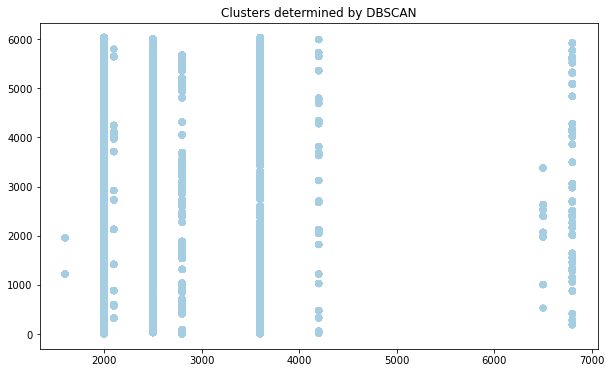

In [40]:
db = DBSCAN(eps=0.4, min_samples=3)
db.fit(X)

y_pred = db.fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")
print("Number of Clusters Obtained from Kmeans : ",len(set(y_pred)))

In [46]:
v = list(data_main["service_address"].value_counts()[:200].index)

In [48]:
url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote("Houston") +'?format=json'
response = requests.get(url).json()
print('Latitude: '+response[0]['lat']+', Longitude: '+response[0]['lon'])

Latitude: 29.7589382, Longitude: -95.3676974


In [49]:
locations = {}
url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote("Houston") +'?format=json'
response = requests.get(url).json()
print('Latitude: '+response[0]['lat']+', Longitude: '+response[0]['lon'])
locations['Houston'] = [response[0]['lat'],response[0]['lon']]

for j,i in enumerate(v):
    p = i.replace("1/2","")
    p = p.replace("1/5","")
    p = p.replace("1/3","")
    p = p.replace("1/8","")
    p = p+", Houston"
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(p) +'?format=json'
    try:
        response = requests.get(url).json()
        print('Latitude: '+response[0]['lat']+', Longitude: '+response[0]['lon']+i)
        print(j)
        locations[i] = [response[0]['lat'],response[0]['lon']]
    except:
        print(i,j)
        continue

Latitude: 29.7589382, Longitude: -95.3676974
VARIOUS 0
2999 S WAYSIDE 1
Latitude: 29.705951204081636, Longitude: -95.306410408163272511 BROAD ST.
2
8030 BRANIFF ST B 3
Latitude: 29.784165142857145, Longitude: -95.6442850000000114729 1/2 KATY FREEWAY
4
Latitude: 29.863147285714287, Longitude: -95.427798428571427615 1/2 W MONTGOMERY RD
5
Latitude: 29.60451708714285, Longitude: -95.1433190563185213010 SPACE CENTER BLVD.
6
Latitude: 29.86336809377469, Longitude: -95.476046190419215820 LITTLE YORK
7
MAC GREGOR PARK 8
Latitude: 29.796029, Longitude: -95.5746551617 1/8 WYCLIFFE DR
9
Latitude: 29.7584838, Longitude: -95.3536044700 1/2 CHENEVERT
10
Latitude: 29.692792125396764, Longitude: -95.338532286557325203 1/8 PERRY ST
11
Latitude: 29.710745, Longitude: -95.4949526400 HIGH STAR DR
12
Latitude: 29.76752726530612, Longitude: -95.33577363265307611 GREGG
13
Latitude: 29.75008146512393, Longitude: -95.484989750334755875 SAN FELIPE ST
14
Latitude: 29.674764749999998, Longitude: -95.5087148636363

In [50]:
locations

{'Houston': ['29.7589382', '-95.3676974'],
 '2511 BROAD ST.': ['29.705951204081636', '-95.30641040816327'],
 '14729 1/2 KATY FREEWAY': ['29.784165142857145', '-95.64428500000001'],
 '7615 1/2 W MONTGOMERY RD': ['29.863147285714287', '-95.42779842857142'],
 '13010 SPACE CENTER BLVD.': ['29.60451708714285', '-95.14331905631852'],
 '5820 LITTLE YORK': ['29.86336809377469', '-95.47604619041921'],
 '1617 1/8 WYCLIFFE DR': ['29.796029', '-95.574655'],
 '700 1/2 CHENEVERT': ['29.7584838', '-95.3536044'],
 '5203 1/8 PERRY ST': ['29.692792125396764', '-95.33853228655732'],
 '6400 HIGH STAR DR': ['29.710745', '-95.494952'],
 '611 GREGG': ['29.76752726530612', '-95.33577363265307'],
 '5875 SAN FELIPE ST': ['29.75008146512393', '-95.48498975033475'],
 '9595 FONDREN': ['29.674764749999998', '-95.50871486363636'],
 '1400 1/2 TEXAS': ['29.7589382', '-95.3676974'],
 '1718 ALLEN PARKWAY': ['29.761409180454333', '-95.38244031275535'],
 '1126 1/2 DALLAS ST': ['29.754693836734692', '-95.36500565306123'],


In [52]:
pickle.dump(locations,open("locations.pkl","wb"))

In [ ]:
for k in range(1, 11):
    agg_cluster = AgglomerativeClustering(
        n_clusters=k, 
        affinity='euclidean', 
        linkage='single'
    )
    agg_cluster.fit(X)
    break

In [ ]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

In [ ]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

## Reflection

1. The hardest part of the project so far was the initial data cleaning process and making sense of the columns. So far the correlation between the features is still quite low so generating useful insights from these features is proving challenging. 

2. During Summer/Fall months there is quite high usage of energy. As well as there are few business areas where there is more usage of energy. This has been visualized as well.

3. The results so far are preliminary. We need to iterate further on these results and thhe observations in order to verify the conclusions befere we can confidently say that our observations are indeed correct.

4. The data might prove insufficient for few of the ML tasks that we are planning on performing. Therefore finding another data source which can be combined with these datasets is going to prove difficult in case the need arises.

5. Yes, we believe we are on track with the project. We have a plan to work on the models that have not yet been implemented and we are going to verify the work we have done so far before concluding the work.

6. The data as it stands right now is good as it has been useful to give the insights we have given so far. Once we are able to figure out the time-series and Clustering analysis part as well we would be able ot prove that the data is able to forecast as well and cluster high energy needing areas into groups.


## Next Work
We want to recheck our work done so far to verify the data cleaning and analysis that we have done. Once we get more confidence in the results we have presented here we want to work on the time series analysis and clustering analysis which is pending.
We will look for further resources to help get us started on these two model tasks.
The project would have achieved its goals if we are able to answer the hypotheses that we have come up with.


## References
1. [sklearn](https://scikit-learn.org/stable/)
2. [pandas](https://pandas.pydata.org/docs/)
3. [scipy](https://docs.scipy.org/doc/scipy/)
4. [data](https://data.world/houston/houston-electricity-bills)